In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

print(torch.__version__)
print(torch.cuda.is_available())

1.6.0
True


# 1. Dataset
- Simulate: series(t) = sin(t) + noise

In [2]:
N = 1000

t = 0.1*np.arange(N)
series = np.sin(t) + np.random.randn(N)*0.1

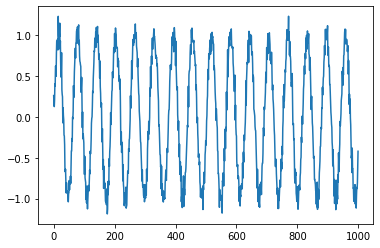

In [3]:
plt.plot(series)
plt.show()

#### Define dataset
- Predict y(next t+10) based on X

In [4]:
T = 10
X = []
y = []

for t in range(len(series) - T):
    x_series = series[t:t+T]
    X.append(x_series)

    y_series = series[t+T]
    y.append(y_series)

X = np.array(X).reshape(-1, T)
y = np.array(y).reshape(-1, 1)
print("X.shape", X.shape, "y.shape", y.shape)

X.shape (990, 10) y.shape (990, 1)


#### Train-test split

In [5]:
N = len(X)

X_train = X[:-N//2]
y_train = y[:-N//2]

X_test = X[:-N//2:]
y_test = y[:-N//2:]

#### Convert to torch tensor

In [6]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
print(X_train.shape, y_train.shape)


X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
print(X_test.shape, y_test.shape)

torch.Size([495, 10]) torch.Size([495, 1])
torch.Size([495, 10]) torch.Size([495, 1])


# 2. Model

In [7]:
import torch.nn as nn

# Autoregressive linear model
ar_model = nn.Linear(T, 1)

# Loss
mse_loss = nn.MSELoss()

# optimizer
adam_opt = torch.optim.Adam(ar_model.parameters(), lr=0.1)

# 3. Train

In [8]:
def fit(X_train, y_train, X_valid, y_valid,
        model, loss_fn, optimizer, epochs=200):

    train_losses = np.zeros(epochs)
    valid_losses = np.zeros(epochs)
    for i in range(epochs):
        # zero gradients
        optimizer.zero_grad()

        # Forward
        y_train_ = model(X_train)
        loss = loss_fn(y_train_, y_train)
      
        # Backward
        loss.backward()
        optimizer.step()

        # Fit valid
        y_valid_ = model(X_valid)
        valid_loss = loss_fn(y_valid_, y_valid)

        # Save losses
        train_losses[i] = loss.item()
        valid_losses[i] = valid_loss.item()
      
        if (i + 1) % 20 == 0:
            print(f'Epoch {i+1}/{epochs}, Train Loss: {loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}')

    # Plot
    plt.plot(train_losses, label='train loss')
    plt.plot(valid_losses, label='valid loss')
    plt.legend()
    plt.show()

Epoch 20/200, Train Loss: 0.0665, Valid Loss: 0.0340
Epoch 40/200, Train Loss: 0.0228, Valid Loss: 0.0180
Epoch 60/200, Train Loss: 0.0154, Valid Loss: 0.0158
Epoch 80/200, Train Loss: 0.0148, Valid Loss: 0.0147
Epoch 100/200, Train Loss: 0.0142, Valid Loss: 0.0141
Epoch 120/200, Train Loss: 0.0137, Valid Loss: 0.0136
Epoch 140/200, Train Loss: 0.0133, Valid Loss: 0.0133
Epoch 160/200, Train Loss: 0.0130, Valid Loss: 0.0130
Epoch 180/200, Train Loss: 0.0128, Valid Loss: 0.0128
Epoch 200/200, Train Loss: 0.0127, Valid Loss: 0.0127


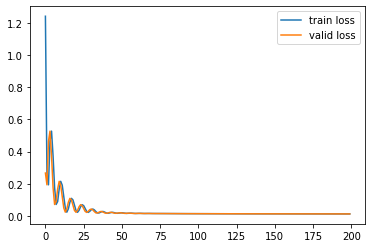

In [9]:
X_valid = X_test
y_valid = y_test

fit(X_train, y_train, X_valid, y_valid,
    model=ar_model, loss_fn=mse_loss, optimizer=adam_opt,
    epochs=200)

# 4. Test

In [10]:
i = 0
y_test_ = []

while len(y_test_) < len(y_test):
    Xb_test = X_test[i].view(1, -1)
    yb_test_ = ar_model(Xb_test)[0,0].item() # 1x1 array -> scalar
    i += 1
  
    # update the predictions list
    y_test_.append(yb_test_)

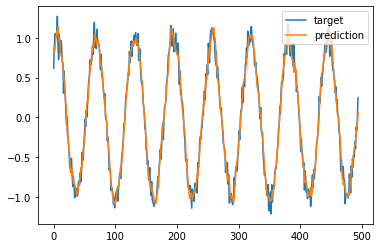

In [11]:
plt.plot(y_test, label='target')
plt.plot(y_test_, label='prediction')
plt.legend()
plt.show()